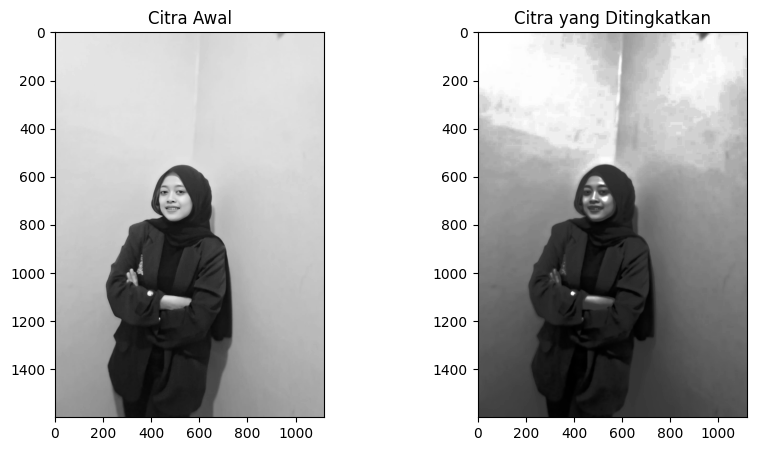

In [2]:
import imageio.v3 as iio
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Membaca citra
image = iio.imread('/content/Foto_ayay.jpeg', mode='L')  # mode='L' untuk grayscale

# Menambahkan filter Gaussian untuk mengurangi noise
blurred_image = ndimage.gaussian_filter(image, sigma=1.5)

# Ekualisasi histogram untuk meningkatkan kontras
def histogram_equalization(img):
    histogram, bin_edges = np.histogram(img.flatten(), bins=256, range=(0, 255))
    cdf = histogram.cumsum()  # Cumulative distribution function
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    equalized_image = np.interp(img.flatten(), bin_edges[:-1], cdf_normalized).reshape(img.shape)
    return equalized_image

equalized_image = histogram_equalization(blurred_image)

# Menampilkan citra awal dan hasil peningkatan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Citra yang Ditingkatkan")
plt.imshow(equalized_image, cmap='gray')
plt.show()
